In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#  Data discription :

#  	person_id : 
unique identity of a person
#   tobacco_consumption   : 
Whether person consumes tobacco	
#   alcohol_consumption	 : 
Whether person consumes alcohol	
#   sdh_occupational_risk :
Social determinants of health - risk of occupation	
0	missing value	
1	Burning the residue of the crop	
2	Burning garbage	
3	Working in a smoke factory	
4	Working in gas/dust/smoke pollution industries	
5	Working in brick kiln and glass industry	
6	Working in mining industry	
7	Working in handloom/julaha industry	
8	Stone workmanship or pottery work	
9	None	

#   gender	:		
F	Female	
M	Male	

#   religion	: 
0	missing value	
1	Hindu	
2	Muslim	
3	Sikh	
4	Christian	
5	Buddhist	
6	Jain	
7	Other	
# caste:
0	missing value	
1	Gen	
2	SC	
3	ST	
4	OBC	
5	Other	
# is_literate:Whether the person knows to read and write	
yes

no
# Age:age of a person

# education_status 	: 
0	missing value	
1	No formal education	
2	Primary 1–5th	
3	Middle 6–8th	
4	Secondary	
5	Higher secondary	
6	Graduate	
7	Post graduate	
# occupation_status
0	missing value	
1	Government service	
2	Private service	
3	Self business	
4	Agriculture	
5	Labour	
6	House work	
7	Retired	
8	Unemployed	
9	Housewife/Housemaker	
10	Student(Study only)	
# primary_cooking_fuel
0	missing value	
1	Burning wood	
2	Crop residues	
3	Cow dung cakes	
4	Coal	
5	Kerosene oil (kerosene)	
6	LPG	
7	Other	
8	None	
# primary_drinking_water
		
0	missing value	
1	R.O water personal	
2	R.O water public	
3	Tap water	
4	Handpump/Tube well inside house	
5	Handpump/Tube well outside house	
6	Well	
7	Water tanks	
8	Tanker	
9	River water	
10	Pond	
11	Other	
 
# primary_toilet
0	missing value	
1	Toilet with water	
2	Toilet without water	
3	Toilet with drier pits with running water	
4	Toilet with drier pits without running water	
5	Public Toilet	
6	No toilet	
7	Other	

# primary_transport
		
0	missing value	
1	Motorcycle (Two wheeler)	
2	Car (Four wheeler)	
3	Tractor	
4	Animal cart	
5	Public transport	
6	None	
7	Other	

# toilet_usage_status
		
0	missing value	
1	Everyone	
2	Few members	
3	No one	
# primary_electricity
		
0	missing value	
1	Line electricity	
2	Generator	
3	Solar power	
4	Kerosene lamp	
5	Other	

# primary_house_material
0	missing value	
1	Clay house	
2	Made of clay and slurry (Kachcha-Pakka)	
3	Brick and concrete house (Pakka)	
4	Brick and concrete house (Teen Shed)	
5	Brick and concrete house (Khaprail)	
6	Made of wood and teen shed	
7	Hut/House made of hay	
8	Other	


                                     


# Data Reading

In [2]:
data=pd.read_excel("Biostatistician_Challenge_Dataset.xlsx")

In [3]:
data.head()

,person_id,tobacco_consumption,alcohol_consumption,sdh_occupational_risk,gender,religion,caste,is_literate,age,education_status,occupation_status,primary_cooking_fuel,primary_drinking_water,primary_toilet,primary_transport,toilet_usage_status,primary_electricity,primary_house_material,diseases
0,3177498,In past/sometimes,Yes,9.0,M,1,3,Yes,30.0,Primary 1-5th,5.0,1,5.0,6.0,Motorcycle (Two wheeler),0.0,1.0,1,0
1,3177499,NaN,NaN,0.0,F,0,0,No,2.0,0,0.0,1,5.0,6.0,Motorcycle (Two wheeler),0.0,1.0,1,0
2,3177500,In past/sometimes,Yes,0.0,F,1,3,Yes,29.0,Middle 6-8th,9.0,1,5.0,6.0,Motorcycle (Two wheeler),0.0,1.0,1,0
3,3177501,NaN,NaN,0.0,F,0,0,No,68.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0,0
4,3177502,In past/sometimes,Yes,9.0,M,1,3,Yes,22.0,Primary 1-5th,5.0,0,0.0,0.0,0,0.0,0.0,0,0


In [4]:
data.columns

Index(['person_id', 'tobacco_consumption', 'alcohol_consumption',
       'sdh_occupational_risk', 'gender', 'religion', 'caste', 'is_literate',
       'age', 'education_status', 'occupation_status', 'primary_cooking_fuel',
       'primary_drinking_water', 'primary_toilet', 'primary_transport',
       'toilet_usage_status', 'primary_electricity', 'primary_house_material',
       'diseases'],
      dtype='object')

In [5]:
data.describe()

,person_id,sdh_occupational_risk,religion,caste,age,occupation_status,primary_drinking_water,primary_toilet,toilet_usage_status,primary_electricity,diseases
count,1.390430e+05,137812.000000,139043.000000,139043.000000,113049.000000,138388.000000,135068.000000,135068.000000,133479.000000,135068.000000,139043.000000
mean,1.865410e+06,3.343054,0.950152,2.379602,30.128334,3.248237,4.087082,3.464159,0.587695,0.989968,0.032896
std,1.325424e+06,4.254496,0.570509,1.235876,20.086139,3.234125,1.962417,2.473946,0.807194,0.722426,0.178366
min,9.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.386855e+05,0.000000,1.000000,1.000000,14.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
50%,2.165214e+06,0.000000,1.000000,3.000000,26.000000,4.000000,5.000000,3.000000,0.000000,1.000000,0.000000
75%,3.055472e+06,9.000000,1.000000,3.000000,43.000000,6.000000,5.000000,6.000000,1.000000,1.000000,0.000000
max,3.829822e+06,9.000000,7.000000,5.000000,120.000000,10.000000,11.000000,7.000000,3.000000,5.000000,1.000000


In [6]:
data.shape

(139043, 19)

In [7]:
df=data.drop(['person_id'], axis=1)
df.head(2)

,tobacco_consumption,alcohol_consumption,sdh_occupational_risk,gender,religion,caste,is_literate,age,education_status,occupation_status,primary_cooking_fuel,primary_drinking_water,primary_toilet,primary_transport,toilet_usage_status,primary_electricity,primary_house_material,diseases
0,In past/sometimes,Yes,9.0,M,1,3,Yes,30.0,Primary 1-5th,5.0,1,5.0,6.0,Motorcycle (Two wheeler),0.0,1.0,1,0
1,NaN,NaN,0.0,F,0,0,No,2.0,0,0.0,1,5.0,6.0,Motorcycle (Two wheeler),0.0,1.0,1,0


In [8]:
data.describe()

,person_id,sdh_occupational_risk,religion,caste,age,occupation_status,primary_drinking_water,primary_toilet,toilet_usage_status,primary_electricity,diseases
count,1.390430e+05,137812.000000,139043.000000,139043.000000,113049.000000,138388.000000,135068.000000,135068.000000,133479.000000,135068.000000,139043.000000
mean,1.865410e+06,3.343054,0.950152,2.379602,30.128334,3.248237,4.087082,3.464159,0.587695,0.989968,0.032896
std,1.325424e+06,4.254496,0.570509,1.235876,20.086139,3.234125,1.962417,2.473946,0.807194,0.722426,0.178366
min,9.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.386855e+05,0.000000,1.000000,1.000000,14.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
50%,2.165214e+06,0.000000,1.000000,3.000000,26.000000,4.000000,5.000000,3.000000,0.000000,1.000000,0.000000
75%,3.055472e+06,9.000000,1.000000,3.000000,43.000000,6.000000,5.000000,6.000000,1.000000,1.000000,0.000000
max,3.829822e+06,9.000000,7.000000,5.000000,120.000000,10.000000,11.000000,7.000000,3.000000,5.000000,1.000000


#  Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139043 entries, 0 to 139042
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   tobacco_consumption     91065 non-null   object 
 1   alcohol_consumption     123738 non-null  object 
 2   sdh_occupational_risk   137812 non-null  float64
 3   gender                  139043 non-null  object 
 4   religion                139043 non-null  int64  
 5   caste                   139043 non-null  int64  
 6   is_literate             139043 non-null  object 
 7   age                     113049 non-null  float64
 8   education_status        137322 non-null  object 
 9   occupation_status       138388 non-null  float64
 10  primary_cooking_fuel    135068 non-null  object 
 11  primary_drinking_water  135068 non-null  float64
 12  primary_toilet          135068 non-null  float64
 13  primary_transport       135068 non-null  object 
 14  toilet_usage_status 

In [10]:
df.isnull().sum()

tobacco_consumption       47978
alcohol_consumption       15305
sdh_occupational_risk      1231
gender                        0
religion                      0
caste                         0
is_literate                   0
age                       25994
education_status           1721
occupation_status           655
primary_cooking_fuel       3975
primary_drinking_water     3975
primary_toilet             3975
primary_transport          3975
toilet_usage_status        5564
primary_electricity        3975
primary_house_material     3975
diseases                      0
dtype: int64

In [11]:
df['tobacco_consumption'].value_counts()

Never                79248
In past/sometimes     7205
Daily                 4612
Name: tobacco_consumption, dtype: int64

In [12]:
df['alcohol_consumption'].value_counts()

No     120680
Yes      3058
Name: alcohol_consumption, dtype: int64

In [13]:
df['sdh_occupational_risk'].value_counts()

0.0    79433
9.0    47785
1.0     6153
8.0     1460
2.0      669
7.0      547
4.0      534
5.0      491
3.0      461
6.0      279
Name: sdh_occupational_risk, dtype: int64

In [14]:

x = stats.mode(df['sdh_occupational_risk'])

print(x) 


ModeResult(mode=array([0.]), count=array([79433]))


In [15]:
import statistics
from collections import Counter
frequency_table = Counter(df['sdh_occupational_risk'])
sorted_values = frequency_table.most_common()
second_highest_mode = sorted_values[1][0]
print("second_highest_mode")
print(second_highest_mode)


second_highest_mode
9.0


#  Since the third highest mode is 1.0
because 9 refers to NAN so replace it with the Third highest mode value

In [16]:
df['sdh_occupational_risk'] = df['sdh_occupational_risk'].replace({0.:1.})

df['sdh_occupational_risk'] = df['sdh_occupational_risk'].replace({9.:1.})


df['sdh_occupational_risk'].value_counts()


1.0    133371
8.0      1460
2.0       669
7.0       547
4.0       534
5.0       491
3.0       461
6.0       279
Name: sdh_occupational_risk, dtype: int64

In [17]:
df['gender'].value_counts()

M    70884
F    68148
O       11
Name: gender, dtype: int64

In [18]:

x = stats.mode(df['gender'])

print(x) 


ModeResult(mode=array(['M'], dtype=object), count=array([70884]))


In [19]:
df['gender'] = df['gender'].replace({'O': 'M'})
df['gender'].value_counts()

M    70895
F    68148
Name: gender, dtype: int64

In [20]:
df['religion'].value_counts()

1    121170
0     14618
2      2190
6       771
7       256
4        30
3         8
Name: religion, dtype: int64

In [21]:

x = stats.mode(df['religion'])

print(x) 


ModeResult(mode=array([1], dtype=int64), count=array([121170]))


In [22]:
df['religion'] = df['religion'].replace({0:1})
df['religion'].value_counts()

1    135788
2      2190
6       771
7       256
4        30
3         8
Name: religion, dtype: int64

In [23]:
df['caste'].value_counts()

3    66290
1    21477
2    20016
0    14618
4    12722
5     3920
Name: caste, dtype: int64

In [24]:

x = stats.mode(df['caste'])

print(x) 


ModeResult(mode=array([3], dtype=int64), count=array([66290]))


In [25]:
df['caste'] = df['caste'].replace({0:3})
df['caste'].value_counts()

3    80908
1    21477
2    20016
4    12722
5     3920
Name: caste, dtype: int64

In [26]:
df['is_literate'].value_counts()

No     93601
Yes    45442
Name: is_literate, dtype: int64

In [27]:
df['education_status'].value_counts()

0                91881
Primary 1-5th    11810
Middle 6-8th     10708
4                 8067
5                 4974
6                 4019
1                 3871
7                 1992
Name: education_status, dtype: int64

In [28]:
df['education_status'] = df['education_status'].replace({'Primary 1-5th': 2, 'Middle 6-8th':3})


In [29]:
import statistics
from collections import Counter
frequency_table = Counter(df['education_status'])
sorted_values = frequency_table.most_common()
second_highest_mode = sorted_values[1][0]
print("second_highest_mode")
print(second_highest_mode)


second_highest_mode
2.0


In [30]:
df['education_status'] = df['education_status'].replace({0:2})
df['education_status'].value_counts()

2.0    103691
3.0     10708
4.0      8067
5.0      4974
6.0      4019
1.0      3871
7.0      1992
Name: education_status, dtype: int64

In [31]:
df['occupation_status'].value_counts()

0.0     59798
5.0     23394
6.0     15441
4.0     11317
9.0     11015
8.0      4936
3.0      3973
2.0      3000
10.0     2363
7.0      1885
1.0      1266
Name: occupation_status, dtype: int64

In [32]:
import statistics
from collections import Counter
frequency_table = Counter(df['occupation_status'])
sorted_values = frequency_table.most_common()
second_highest_mode = sorted_values[1][0]
print("second_highest_mode")
print(second_highest_mode)


second_highest_mode
5.0


In [33]:
df['occupation_status'] = df['occupation_status'].replace({0.0:5.0})
df['occupation_status'].value_counts()

5.0     83192
6.0     15441
4.0     11317
9.0     11015
8.0      4936
3.0      3973
2.0      3000
10.0     2363
7.0      1885
1.0      1266
Name: occupation_status, dtype: int64

In [34]:
df['primary_cooking_fuel'].value_counts()

1                          56092
6                          40014
0                          13467
1                           8840
6                           8347
0                           3303
8                           2291
7                            686
3                            627
8                            535
4                            225
2                            222
Kerosene oil (kerosene)      149
7                            141
4                             61
2                             45
3                             23
Name: primary_cooking_fuel, dtype: int64

In [35]:
df['primary_cooking_fuel'] = df['primary_cooking_fuel'].replace({'Kerosene oil (kerosene)': 2})

In [36]:
x = stats.mode(df['primary_cooking_fuel'])

print(x) 


ModeResult(mode=array([1], dtype=object), count=array([56092]))


In [37]:
df['primary_cooking_fuel'] = df['primary_cooking_fuel'].replace({'0.0': 0})
df['primary_cooking_fuel'] = df['primary_cooking_fuel'].replace({'1.0': 1})
df['primary_cooking_fuel'] = df['primary_cooking_fuel'].replace({'2.0': 2})
df['primary_cooking_fuel'] = df['primary_cooking_fuel'].replace({'3.0': 3})
df['primary_cooking_fuel'] = df['primary_cooking_fuel'].replace({'4.0': 4})
df['primary_cooking_fuel'] = df['primary_cooking_fuel'].replace({'5.0': 5})
df['primary_cooking_fuel'] = df['primary_cooking_fuel'].replace({'6.0': 6})
df['primary_cooking_fuel'] = df['primary_cooking_fuel'].replace({'7.0': 7})
df['primary_cooking_fuel'] = df['primary_cooking_fuel'].replace({'8.0': 8})

df['primary_cooking_fuel'] = df['primary_cooking_fuel'].replace({0: 1})
df['primary_cooking_fuel'].value_counts()

1    69559
6    40014
1     8840
6     8347
0     3303
8     2291
7      686
3      627
8      535
2      371
4      225
7      141
4       61
2       45
3       23
Name: primary_cooking_fuel, dtype: int64

In [38]:
df['primary_drinking_water'].value_counts()

5.0     56304
3.0     22909
4.0     18634
0.0     16770
6.0     15049
9.0      1524
7.0      1096
1.0       951
11.0      702
10.0      546
2.0       538
8.0        45
Name: primary_drinking_water, dtype: int64

In [39]:
x = stats.mode(df['primary_drinking_water'])

print(x) 


ModeResult(mode=array([5.]), count=array([56304]))


In [40]:
df['primary_drinking_water'] = df['primary_drinking_water'].replace({0.0:5.0})
df['primary_drinking_water'].value_counts()


5.0     73074
3.0     22909
4.0     18634
6.0     15049
9.0      1524
7.0      1096
1.0       951
11.0      702
10.0      546
2.0       538
8.0        45
Name: primary_drinking_water, dtype: int64

In [41]:
df['primary_toilet'].value_counts()

6.0    57364
1.0    29940
2.0    17031
0.0    16770
3.0     6487
5.0     3719
7.0     2209
4.0     1548
Name: primary_toilet, dtype: int64

In [42]:
x = stats.mode(df['primary_toilet'])

print(x) 


ModeResult(mode=array([6.]), count=array([57364]))


In [43]:
df['primary_toilet'] = df['primary_toilet'].replace({0.0:6.0})
df['primary_toilet'].value_counts()

6.0    74134
1.0    29940
2.0    17031
3.0     6487
5.0     3719
7.0     2209
4.0     1548
Name: primary_toilet, dtype: int64

In [44]:
df['primary_transport'].value_counts()

Motorcycle (Two wheeler)    69108
6                           41779
0                           16719
Car (Four wheeler)           2759
7                            2509
5                            1171
3                             689
4                             246
0                              51
6                              31
3                               3
5                               1
7                               1
4                               1
Name: primary_transport, dtype: int64

In [45]:
x = stats.mode(df['primary_transport'])

print(x) 


ModeResult(mode=array(['Motorcycle (Two wheeler)'], dtype=object), count=array([69108]))


In [46]:
df['primary_transport'] = df['primary_transport'].replace({0.0:1})

df['primary_transport'] = df['primary_transport'].replace({1:1})
df['primary_transport'] = df['primary_transport'].replace({2:2})
df['primary_transport'] = df['primary_transport'].replace({'3':3})
df['primary_transport'] = df['primary_transport'].replace({'4':4})
df['primary_transport'] = df['primary_transport'].replace({'5':5})
df['primary_transport'] = df['primary_transport'].replace({'6':6})
df['primary_transport'] = df['primary_transport'].replace({'7':7})
df['primary_transport'] = df['primary_transport'].replace({8:8})
df['primary_transport'] = df['primary_transport'].replace({'Motorcycle (Two wheeler)': 1})
df['primary_transport'] = df['primary_transport'].replace({'Car (Four wheeler)': 2})


df['primary_transport'].value_counts()

1    69159
6    41810
0    16719
2     2759
7     2510
5     1172
3      692
4      247
Name: primary_transport, dtype: int64

In [47]:
df['toilet_usage_status'].value_counts()

0.0    74754
1.0    46598
3.0     7593
2.0     4534
Name: toilet_usage_status, dtype: int64

In [48]:
x = stats.mode(df['toilet_usage_status'])

print(x) 


ModeResult(mode=array([0.]), count=array([74754]))


In [49]:
import statistics
from collections import Counter
frequency_table = Counter(df['toilet_usage_status'])
sorted_values = frequency_table.most_common()
second_highest_mode = sorted_values[1][0]
print("second_highest_mode")
print(second_highest_mode)


second_highest_mode
1.0


In [50]:
df['toilet_usage_status'] = df['toilet_usage_status'].replace({0.0:1.0})
df['toilet_usage_status'].value_counts()

1.0    121352
3.0      7593
2.0      4534
Name: toilet_usage_status, dtype: int64

In [51]:
df['primary_electricity'].value_counts()

1.0    113472
0.0     16770
5.0      2331
4.0      1578
2.0       477
3.0       440
Name: primary_electricity, dtype: int64

In [52]:
x = stats.mode(df['primary_electricity'])

print(x) 


ModeResult(mode=array([1.]), count=array([113472]))


In [53]:
df['primary_electricity'] = df['primary_electricity'].replace({0.0:1.0})
df['primary_electricity'].value_counts()

1.0    130242
5.0      2331
4.0      1578
2.0       477
3.0       440
Name: primary_electricity, dtype: int64

In [54]:
df['primary_house_material'].value_counts()

1                                          52506
Brick and concrete house (Pakka)           36070
Made of clay and slurry (Kachcha-Pakka)    27488
0                                          16766
Brick and concrete house (Teen Shed)         920
8                                            531
Brick and concrete house (Khaprail)          394
7                                            255
6                                            114
1                                             19
0                                              4
7                                              1
Name: primary_house_material, dtype: int64

In [55]:
x = stats.mode(df['primary_house_material'])

print(x) 


ModeResult(mode=array(['1'], dtype=object), count=array([52506]))


In [56]:
df['primary_house_material'] = df['primary_house_material'].replace({0:1})
df['primary_house_material'] = df['primary_house_material'].replace({'8':8})
df['primary_house_material'] = df['primary_house_material'].replace({'6':6})
df['primary_house_material'] = df['primary_house_material'].replace({'7':7})
df['primary_house_material'] = df['primary_house_material'].replace({'1':1})


df['primary_house_material'] = df['primary_house_material'].replace({'Brick and concrete house (Pakka)': 2})
df['primary_house_material'] = df['primary_house_material'].replace({'Made of clay and slurry (Kachcha-Pakka)': 3})
df['primary_house_material'] = df['primary_house_material'].replace({'Brick and concrete house (Teen Shed)': 4})
df['primary_house_material'] = df['primary_house_material'].replace({'Brick and concrete house (Khaprail)': 5})








In [57]:
df['primary_house_material'].value_counts()

1    52529
2    36070
3    27488
0    16766
4      920
8      531
5      394
7      256
6      114
Name: primary_house_material, dtype: int64

In [58]:
df['diseases'].value_counts()

0    134469
1      4574
Name: diseases, dtype: int64

In [59]:
df['tobacco_consumption'] = df['tobacco_consumption'].fillna(df['tobacco_consumption'].mode()[0])
df['alcohol_consumption'] = df['alcohol_consumption'].fillna(df['alcohol_consumption'].mode()[0])
df['sdh_occupational_risk'] = df['sdh_occupational_risk'].fillna(df['sdh_occupational_risk'].mode()[0])


df['education_status'] = df['education_status'].fillna(df['education_status'].mode()[0])
df['occupation_status'] = df['occupation_status'].fillna(df['occupation_status'].mode()[0])

df['primary_cooking_fuel'] = df['primary_cooking_fuel'].fillna(df['primary_cooking_fuel'].mode()[0])
df['primary_drinking_water'] = df['primary_drinking_water'].fillna(df['primary_drinking_water'].mode()[0])

df['primary_toilet'] = df['primary_toilet'].fillna(df['primary_toilet'].mode()[0])
df['primary_transport'] = df['primary_transport'].fillna(df['primary_transport'].mode()[0])


df['toilet_usage_status'] = df['toilet_usage_status'].fillna(df['toilet_usage_status'].mode()[0])
df['primary_electricity'] = df['primary_electricity'].fillna(df['primary_electricity'].mode()[0])
df['primary_house_material'] = df['primary_house_material'].fillna(df['primary_house_material'].mode()[0])


In [60]:
df['age'].fillna(int(df['age'].median()), inplace=True)


In [61]:
df.isnull().sum()

tobacco_consumption       0
alcohol_consumption       0
sdh_occupational_risk     0
gender                    0
religion                  0
caste                     0
is_literate               0
age                       0
education_status          0
occupation_status         0
primary_cooking_fuel      0
primary_drinking_water    0
primary_toilet            0
primary_transport         0
toilet_usage_status       0
primary_electricity       0
primary_house_material    0
diseases                  0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139043 entries, 0 to 139042
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   tobacco_consumption     139043 non-null  object 
 1   alcohol_consumption     139043 non-null  object 
 2   sdh_occupational_risk   139043 non-null  float64
 3   gender                  139043 non-null  object 
 4   religion                139043 non-null  int64  
 5   caste                   139043 non-null  int64  
 6   is_literate             139043 non-null  object 
 7   age                     139043 non-null  float64
 8   education_status        139043 non-null  float64
 9   occupation_status       139043 non-null  float64
 10  primary_cooking_fuel    139043 non-null  object 
 11  primary_drinking_water  139043 non-null  float64
 12  primary_toilet          139043 non-null  float64
 13  primary_transport       139043 non-null  object 
 14  toilet_usage_status 

# EDA

#  Univariate - Analysis


C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tobacco_consumption', ylabel='count'>

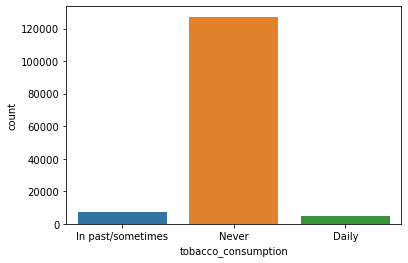

In [63]:
sns.countplot(df['tobacco_consumption'])


# The Count of people who NEVER consumes Tobacco is much higher

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcohol_consumption', ylabel='count'>

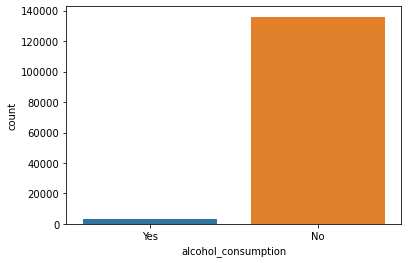

In [64]:
sns.countplot(df['alcohol_consumption'])


#  The people are more Non-alcoholic

In [65]:
df['sdh_occupational_risk'] = df['sdh_occupational_risk'].astype(int)

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sdh_occupational_risk', ylabel='count'>

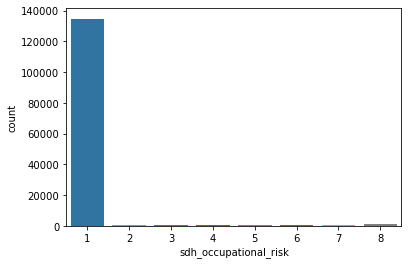

In [66]:
sns.countplot(df['sdh_occupational_risk'])


#  Burning the residue of the crop	is more than compared to other occupatinal risks


C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

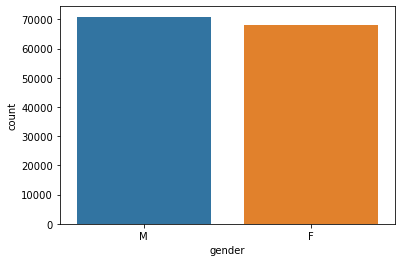

In [67]:
sns.countplot(df['gender'])


#  Male count nd female count are same but Male count is little higher

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='religion', ylabel='count'>

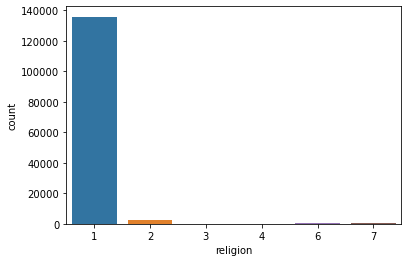

In [68]:
sns.countplot(df['religion'])


# Hindu religion is more 

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='caste', ylabel='count'>

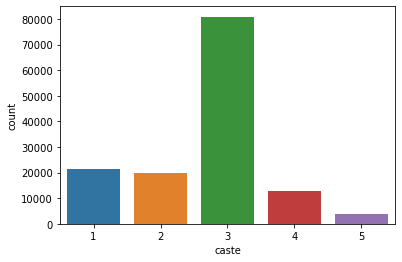

In [69]:
sns.countplot(df['caste'])


# ST people are more than compared to other caste communities

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_literate', ylabel='count'>

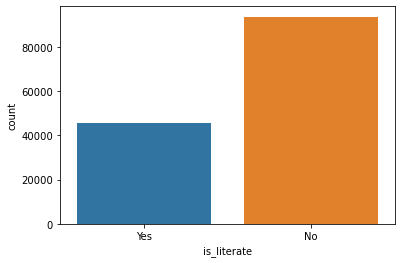

In [70]:
sns.countplot(df['is_literate'])


#  People with illerates are more than literates

In [71]:
df['education_status'] = df['education_status'].astype(int)

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_status', ylabel='count'>

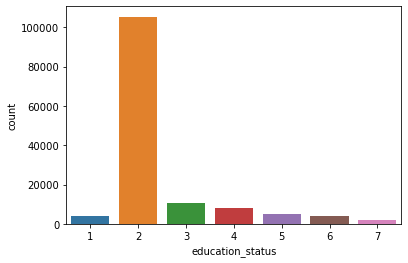

In [72]:
sns.countplot(df['education_status'])


#  People with Primary (1–5th) Education are more 


In [73]:
df['occupation_status'] = df['occupation_status'].astype(int)

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation_status', ylabel='count'>

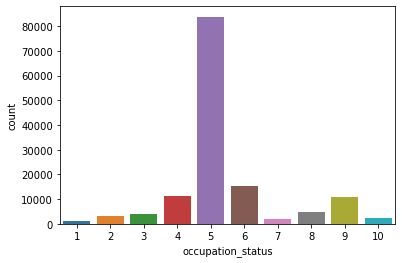

In [74]:
sns.countplot(df['occupation_status'])


# peopls with Labour as an Occupation status are more 

In [75]:
df['primary_cooking_fuel'] = df['primary_cooking_fuel'].astype(int)

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='primary_cooking_fuel', ylabel='count'>

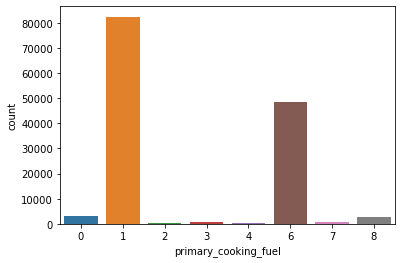

In [76]:
sns.countplot(df['primary_cooking_fuel'])


# people are more in usage of Burning wood forwarded by  LPG	



In [77]:
df['primary_drinking_water'] = df['primary_drinking_water'].astype(int)

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='primary_drinking_water', ylabel='count'>

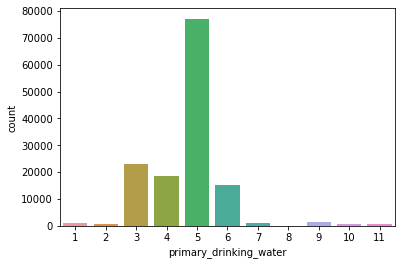

In [78]:
sns.countplot(df['primary_drinking_water'])


# Handpump/Tube well outside house as a primary_drinking_water are more consumed 
 

In [79]:
df['primary_toilet'] = df['primary_toilet'].astype(int)

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='primary_toilet', ylabel='count'>

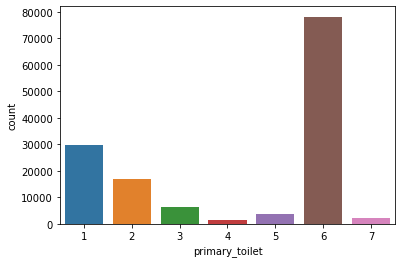

In [80]:
sns.countplot(df['primary_toilet'])


# No toilet	 is more 
 

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='primary_transport', ylabel='count'>

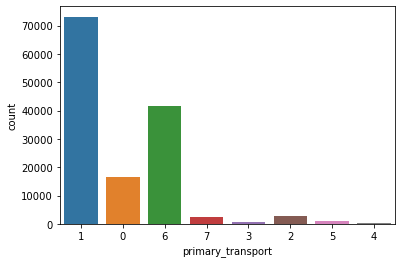

In [81]:
sns.countplot(df['primary_transport'])


# Motorcycle (Two wheeler)	usage is more then No vechile 


In [82]:
df['toilet_usage_status'] = df['toilet_usage_status'].astype(int)

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='toilet_usage_status', ylabel='count'>

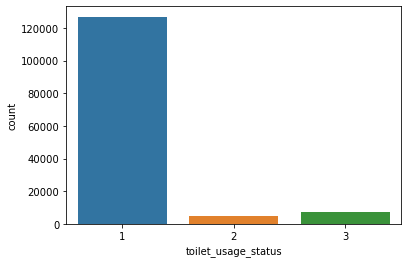

In [83]:
sns.countplot(df['toilet_usage_status'])


# Count of Everyone using the Toilet is more


In [84]:
df['primary_electricity'] = df['primary_electricity'].astype(int)

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='primary_electricity', ylabel='count'>

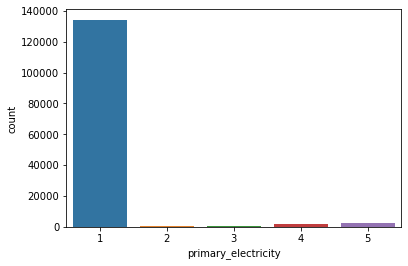

In [85]:
sns.countplot(df['primary_electricity'])


# Line electricity is used as a primary_electricity 


C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='primary_house_material', ylabel='count'>

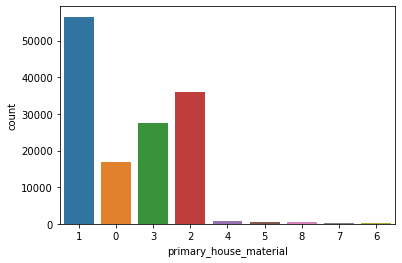

In [86]:
sns.countplot(df['primary_house_material'])


# Clay house is used more as primary_house_material then Made of clay and slurry (Kachcha-Pakka)	

 

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diseases', ylabel='count'>

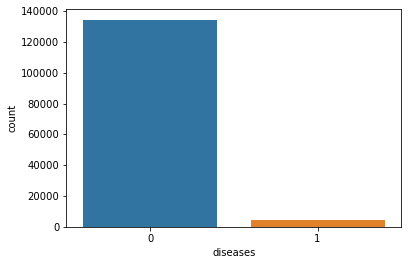

In [87]:
sns.countplot(df['diseases'])


#  No disease count are more than disease count

# Bivariate-Analysis

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of age')

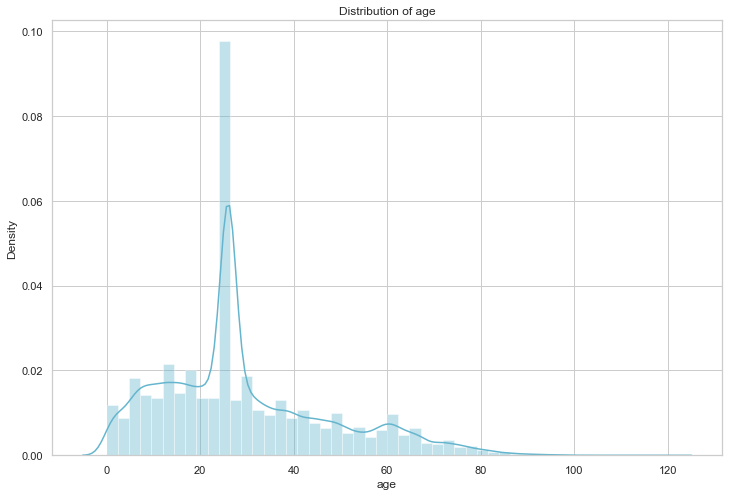

In [88]:
import seaborn as sns
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['age'], kde = True, color = 'c')
plt.title('Distribution of age')

#  age is following Normal Distribution but little Right skewed

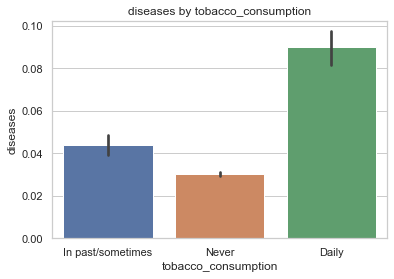

In [89]:
SC=sns.barplot(data=df,x='tobacco_consumption',y='diseases')
SC.set(title='diseases by tobacco_consumption')
plt.show()

# More Daily consumption of tobacco causes Diseases.

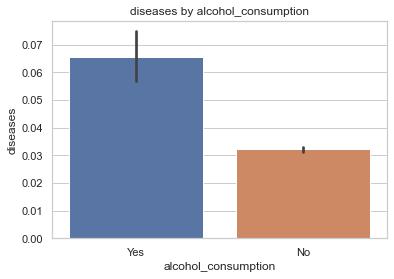

In [90]:
SC=sns.barplot(data=df,x='alcohol_consumption',y='diseases')
SC.set(title='diseases by alcohol_consumption')
plt.show()


#  Diseases are high when Alcohol consumption is high

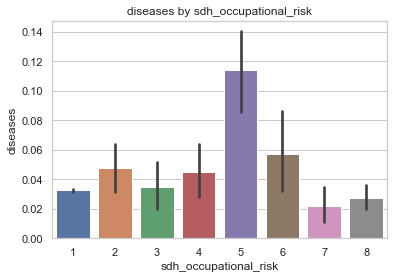

In [91]:
SC=sns.barplot(data=df,x='sdh_occupational_risk',y='diseases')
SC.set(title='diseases by sdh_occupational_risk')
plt.show()

# working under brick kiln and glass industry are more prone to diseases.


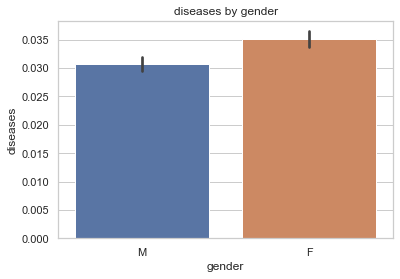

In [92]:
SC=sns.barplot(data=df,x='gender',y='diseases')
SC.set(title='diseases by gender')
plt.show()

# Females are having more diseases than Men

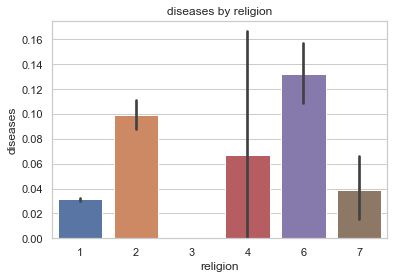

In [93]:
SC=sns.barplot(data=df,x='religion',y='diseases')
SC.set(title='diseases by religion')
plt.show()

# Jain religion are more prone to diseases forwarded by Muslim religion


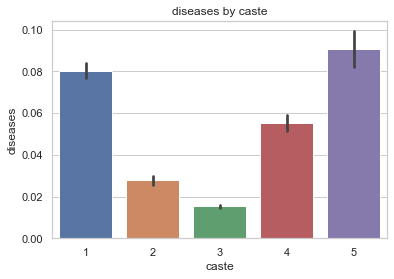

In [94]:
SC=sns.barplot(data=df,x='caste',y='diseases')
SC.set(title='diseases by caste')
plt.show()

# Other Caste communities are more in having diseases then General category


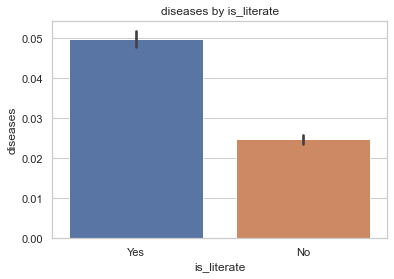

In [95]:
SC=sns.barplot(data=df,x='is_literate',y='diseases')
SC.set(title='diseases by is_literate')
plt.show()

# literates are more in having diseases than illiterate 

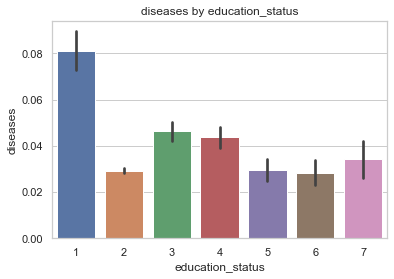

In [96]:
SC=sns.barplot(data=df,x='education_status',y='diseases')
SC.set(title='diseases by education_status')
plt.show()

# No formal education status are more in having diseases.


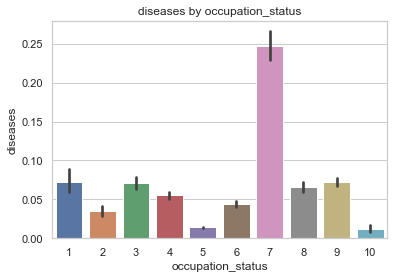

In [97]:
SC=sns.barplot(data=df,x='occupation_status',y='diseases')
SC.set(title='diseases by occupation_status')
plt.show()

# Retired peoples are more in having diseases.
 

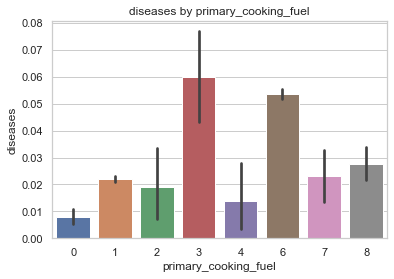

In [98]:
SC=sns.barplot(data=df,x='primary_cooking_fuel',y='diseases')
SC.set(title='diseases by primary_cooking_fuel')
plt.show()

# Cow dung cakes are more responsible for diseases then LPG	



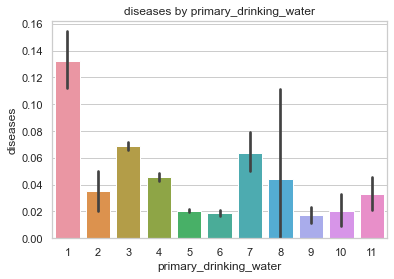

In [99]:
SC=sns.barplot(data=df,x='primary_drinking_water',y='diseases')
SC.set(title='diseases by primary_drinking_water')
plt.show()

# R.O water personal as a drinking source is responsible for having the diseases.


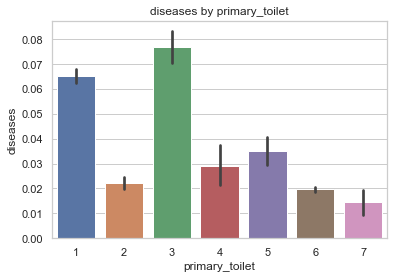

In [100]:
SC=sns.barplot(data=df,x='primary_toilet',y='diseases')
SC.set(title='diseases by primary_toilet')
plt.show()

# Toilet with drier pits with running water	are having more diseases.


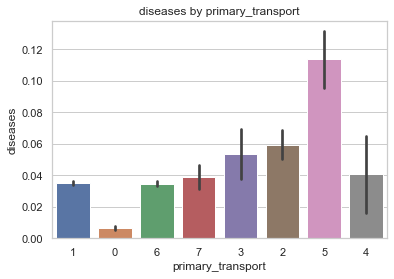

In [101]:
SC=sns.barplot(data=df,x='primary_transport',y='diseases')
SC.set(title='diseases by primary_transport')
plt.show()

# Public transport are more in having diseases.
 

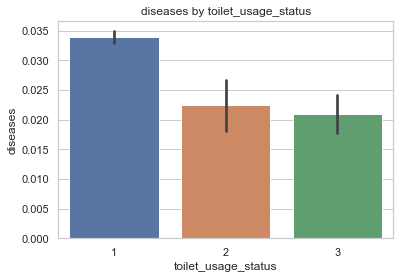

In [102]:
SC=sns.barplot(data=df,x='toilet_usage_status',y='diseases')
SC.set(title='diseases by toilet_usage_status')
plt.show()

# usage of Toilet by  Everyone  is responsible for having diseases.


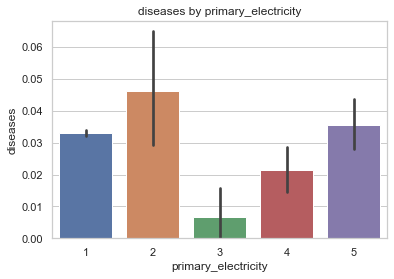

In [103]:
SC=sns.barplot(data=df,x='primary_electricity',y='diseases')
SC.set(title='diseases by primary_electricity')
plt.show()

#  Generator as a primary_electricity are more in having diseases.


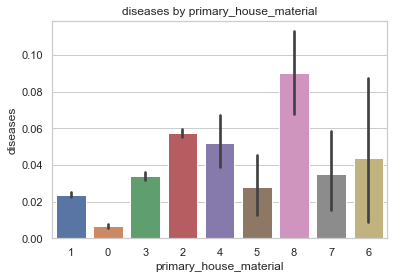

In [104]:
SC=sns.barplot(data=df,x='primary_house_material',y='diseases')
SC.set(title='diseases by primary_house_material')
plt.show()

# Other	resources used as a primary house material are more prone to diseases then houses Made of clay and slurry (Kachcha-Pakka).


Text(0.5, 1.0, 'diseases  by age')

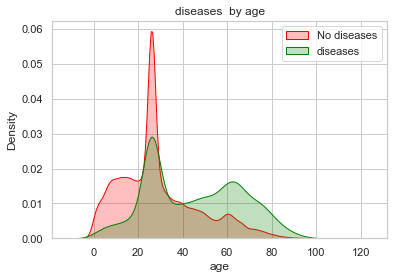

In [105]:
#Churn by MonthlyCharges and TotalCharges
Month = sns.kdeplot(df.age[(df["diseases"] == 0) ],color="Red", shade = True)
Month = sns.kdeplot(df.age[(df["diseases"] == 1) ],ax =Month, color="Green", shade= True)
Month.legend(["No diseases","diseases"],loc='upper right')
Month.set_ylabel('Density')
Month.set_xlabel('age')
Month.set_title('diseases  by age')

# High chance of causing diseases in the age limit 60-80 than Adults.

<AxesSubplot:>

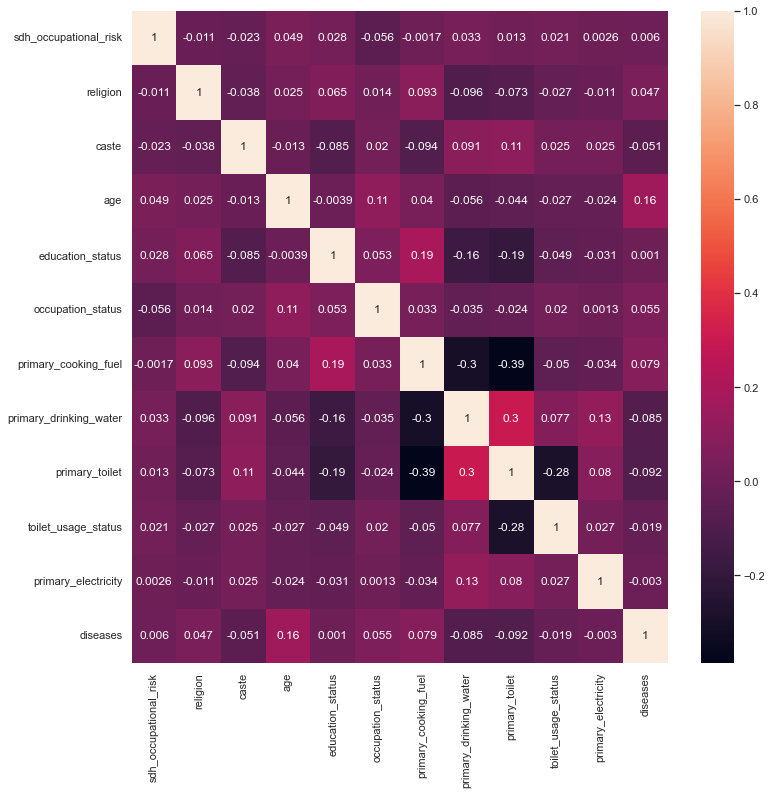

In [106]:
#Build a correlation of all predictors with 'Churn'
cor=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True)

# There is no mutlicolinearity presents in the data

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder object to the 'color' column and transform the values
df['tobacco_consumption'] = le.fit_transform(df['tobacco_consumption'])
df['alcohol_consumption'] = le.fit_transform(df['alcohol_consumption'])
df['gender'] = le.fit_transform(df['gender'])
df['toilet_usage_status'] = df['toilet_usage_status'].astype(int)
df['is_literate'] = le.fit_transform(df['is_literate'])

In [108]:
df['tobacco_consumption'].value_counts()

2    127226
1      7205
0      4612
Name: tobacco_consumption, dtype: int64

In [109]:
df['alcohol_consumption'].value_counts()

0    135985
1      3058
Name: alcohol_consumption, dtype: int64

In [110]:
df['gender'].value_counts() 

1    70895
0    68148
Name: gender, dtype: int64

In [111]:
df['is_literate'].value_counts() 

0    93601
1    45442
Name: is_literate, dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139043 entries, 0 to 139042
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   tobacco_consumption     139043 non-null  int32  
 1   alcohol_consumption     139043 non-null  int32  
 2   sdh_occupational_risk   139043 non-null  int32  
 3   gender                  139043 non-null  int32  
 4   religion                139043 non-null  int64  
 5   caste                   139043 non-null  int64  
 6   is_literate             139043 non-null  int32  
 7   age                     139043 non-null  float64
 8   education_status        139043 non-null  int32  
 9   occupation_status       139043 non-null  int32  
 10  primary_cooking_fuel    139043 non-null  int32  
 11  primary_drinking_water  139043 non-null  int32  
 12  primary_toilet          139043 non-null  int32  
 13  primary_transport       139043 non-null  object 
 14  toilet_usage_status 

# Detecting of outliers

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

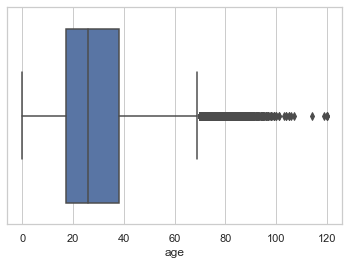

In [113]:
sns.boxplot(df['age'])

# Replace with IQR(Inter-quartile range)
since the outliers are more in number so replace it with IQR is more efficient.

In [115]:
q75, q25 = np.percentile(df['age'], [75 ,25])
iqr = q75 - q25
lower_bound = q25 - (iqr * 1.5)
upper_bound = q75 + (iqr * 1.5)
df.loc[df['age'] < lower_bound, 'age'] = lower_bound
df.loc[df['age'] > upper_bound, 'age'] = upper_bound

C:\Users\mounika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

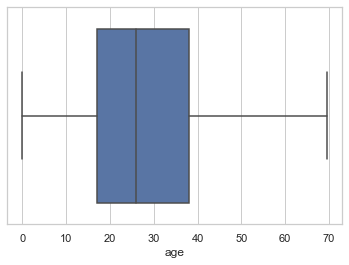

In [116]:
sns.boxplot(df['age'])

#  Feature subset Selection using chi-square

In [210]:
x=df.iloc[:,0:17]
y=df.iloc[:,-1]


In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [212]:
from mrmr import mrmr_classif
from sklearn.datasets import make_classification
import mrmr

In [213]:
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=x, y=Y, K=9)
selected_features

100%|██████████| 9/9 [00:01<00:00,  5.41it/s]


['age',
 'caste',
 'primary_toilet',
 'tobacco_consumption',
 'primary_drinking_water',
 'occupation_status',
 'religion',
 'primary_cooking_fuel',
 'is_literate']

# Modeling and Evalution

In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [215]:
X=df[['age',
 'caste',
 'primary_toilet',
 'tobacco_consumption',
 'primary_drinking_water',
 'occupation_status',
 'religion',
 'primary_cooking_fuel',
 'is_literate']]
Y=df[['diseases']]

In [216]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [217]:
pip install pandas_profiling


Note: you may need to restart the kernel to use updated packages.


In [218]:
import pandas_profiling

In [219]:
from pandas_profiling import ProfileReport

In [220]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
from imblearn.over_sampling import SMOTE
X_resampled,Y_resampled=SMOTE().fit_resample(X,Y)
Y_resampled.value_counts()

diseases
0           134469
1           134469
dtype: int64

#  Logistic Regression

In [221]:
model1=LogisticRegression()
model1.fit(X_resampled,Y_resampled) 
pred1=model1.predict(X_test) 
accuracy_score(pred1,Y_test)*100

73.30808141346822

In [222]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
cm_rfc = confusion_matrix(Y_test, pred1)
print("Accuracy of the  Logistic  model is ",accuracy_score(pred1,Y_test)*100)

Accuracy of the  Logistic  model is  73.30808141346822


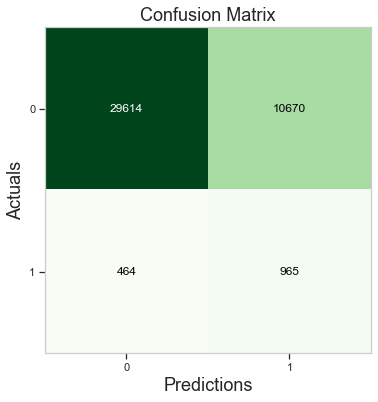

In [223]:
fig, ax = plot_confusion_matrix(conf_mat=cm_rfc, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [224]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(Y_test, pred1)

print(report)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84     40284
           1       0.08      0.68      0.15      1429

    accuracy                           0.73     41713
   macro avg       0.53      0.71      0.49     41713
weighted avg       0.95      0.73      0.82     41713



# Decision Tree

In [225]:
model3=DecisionTreeClassifier() 
model3.fit(X_resampled,Y_resampled)
pred3=model3.predict(X_test) 
accuracy_score(pred3,Y_test)*100

93.21554431472204

In [226]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
cm_rfc = confusion_matrix(Y_test, pred3)
print("Accuracy of the Decision Tree Classifier model is ",accuracy_score(pred3,Y_test)*100)

Accuracy of the Decision Tree Classifier model is  93.21554431472204


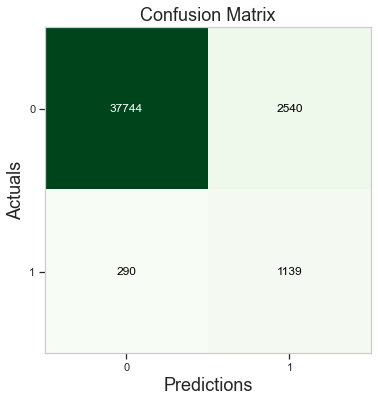

In [227]:
fig, ax = plot_confusion_matrix(conf_mat=cm_rfc, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [228]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(Y_test, pred3)

print(report)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     40284
           1       0.31      0.80      0.45      1429

    accuracy                           0.93     41713
   macro avg       0.65      0.87      0.70     41713
weighted avg       0.97      0.93      0.95     41713



# Random forest


In [229]:
model4=RandomForestClassifier() 
model4.fit(X_resampled,Y_resampled)
pred4=model4.predict(X_test)
accuracy_score(pred4,Y_test)*100

93.14122695562534

In [230]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
cm_rfc = confusion_matrix(Y_test, pred4)
print("Accuracy of the Random forest  is ",accuracy_score(pred4,Y_test)*100)

Accuracy of the Random forest  is  93.14122695562534


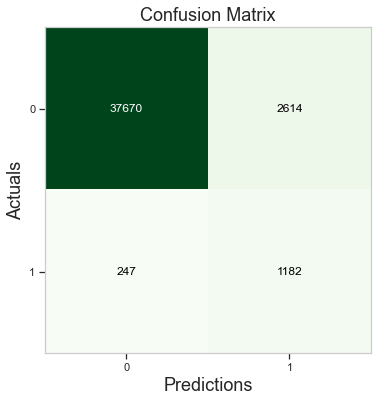

In [231]:
fig, ax = plot_confusion_matrix(conf_mat=cm_rfc, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [232]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(Y_test, pred4)

print(report)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     40284
           1       0.31      0.83      0.45      1429

    accuracy                           0.93     41713
   macro avg       0.65      0.88      0.71     41713
weighted avg       0.97      0.93      0.95     41713



# KNN(K-nearest neighbours) 

In [233]:
model5=KNeighborsClassifier()
model5.fit(X_resampled,Y_resampled)
pred5=model5.predict(X_test) 
accuracy_score(pred5,Y_test)*100

94.9823795938916

In [234]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
cm_rfc = confusion_matrix(Y_test, pred5)
print("Accuracy of the KNN is ",accuracy_score(pred5,Y_test)*100)

Accuracy of the KNN is  94.9823795938916


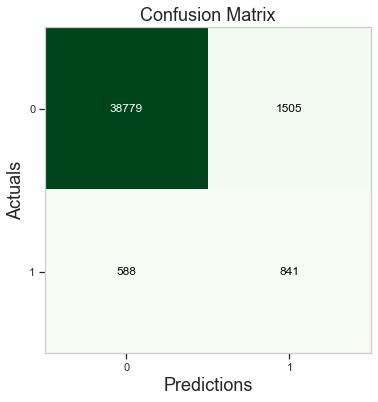

In [235]:
fig, ax = plot_confusion_matrix(conf_mat=cm_rfc, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [236]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(Y_test, pred5)

print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     40284
           1       0.36      0.59      0.45      1429

    accuracy                           0.95     41713
   macro avg       0.67      0.78      0.71     41713
weighted avg       0.96      0.95      0.96     41713



#  Naive Bayes

In [237]:
model6=GaussianNB() 
model6.fit(X_resampled,Y_resampled)
pred6=model6.predict(X_test)
accuracy_score(pred6,Y_test)*100

78.13151775225948

In [238]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
cm_rfc = confusion_matrix(Y_test, pred6)
print("Accuracy of the Navie bayes is ",accuracy_score(pred6,Y_test)*100)

Accuracy of the Navie bayes is  78.13151775225948


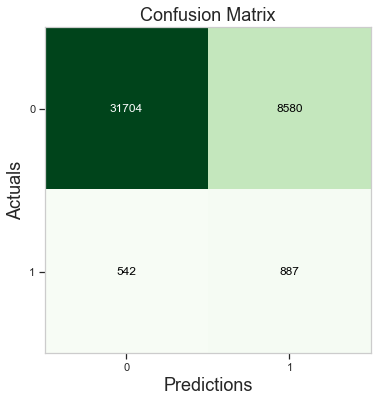

In [239]:
fig, ax = plot_confusion_matrix(conf_mat=cm_rfc, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [240]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(Y_test, pred6)

print(report)

              precision    recall  f1-score   support

           0       0.98      0.79      0.87     40284
           1       0.09      0.62      0.16      1429

    accuracy                           0.78     41713
   macro avg       0.54      0.70      0.52     41713
weighted avg       0.95      0.78      0.85     41713



# GradientBoosting

In [241]:
model7=GradientBoostingClassifier() 
model7.fit(X_resampled,Y_resampled)
pred7=model7.predict(X_test) 
accuracy_score(pred7,Y_test)*100

77.24929877975691

In [242]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
cm_rfc = confusion_matrix(Y_test, pred7)
print("Accuracy of the  GradientBoostingClassifier model is ",accuracy_score(pred7,Y_test)*100)

Accuracy of the  GradientBoostingClassifier model is  77.24929877975691


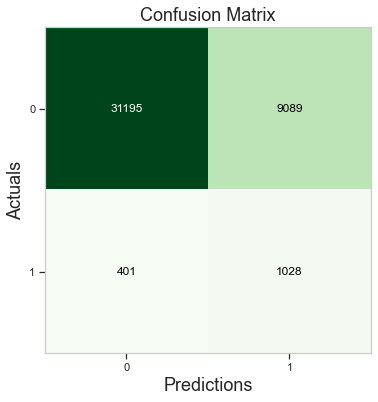

In [243]:
fig, ax = plot_confusion_matrix(conf_mat=cm_rfc, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [244]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(Y_test, pred7)

print(report)

              precision    recall  f1-score   support

           0       0.99      0.77      0.87     40284
           1       0.10      0.72      0.18      1429

    accuracy                           0.77     41713
   macro avg       0.54      0.75      0.52     41713
weighted avg       0.96      0.77      0.84     41713



In [245]:
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),GaussianNB(),GradientBoostingClassifier()] 

# Accuracy scores for top selected features

In [246]:
classifier=DecisionTreeClassifier()
k=9
cv_result=cross_val_score(classifier,X,Y,cv=k)
print('Accuracy score for each folds:',cv_result)
print('Overall Accuracy:',np.sum(cv_result)/k)

Accuracy score for each folds: [0.95385113 0.95404531 0.95326558 0.95216519 0.94828144 0.95287721
 0.95320085 0.95015859 0.95190627]
Overall Accuracy: 0.9521946195982471


#  Evaluation using new-inputs

In [247]:
df.tail()

,tobacco_consumption,alcohol_consumption,sdh_occupational_risk,gender,religion,caste,is_literate,age,education_status,occupation_status,primary_cooking_fuel,primary_drinking_water,primary_toilet,primary_transport,toilet_usage_status,primary_electricity,primary_house_material,diseases
139038,0,0,1,1,1,3,1,61.0,3,4,1,4,6,1,1,1,3,1
139039,0,0,1,0,1,3,0,55.0,2,4,1,4,6,1,1,1,3,0
139040,2,0,1,0,1,3,0,66.0,2,6,1,5,6,1,1,1,1,0
139041,2,0,1,1,1,3,1,65.0,4,7,6,5,1,1,3,1,3,1
139042,2,0,1,1,1,3,1,66.0,1,7,1,5,6,1,1,1,1,1


In [248]:
X=df[['age',
 'caste',
 'primary_toilet',
 'tobacco_consumption',
 'primary_drinking_water',
 'occupation_status',
 'religion',
 'primary_cooking_fuel',
 'is_literate']]
Y=df[['diseases']]

In [258]:
new=[[61.0,3,6,0,4,4,1,1,1]]

In [259]:
out=model1.predict(new)
out

array([1], dtype=int64)

In [260]:
out=model3.predict(new)
out

array([1], dtype=int64)

In [261]:
out=model4.predict(new)
out

array([1], dtype=int64)

In [262]:
out=model5.predict(new)
out

array([1], dtype=int64)

In [263]:
out=model6.predict(new)
out

array([1], dtype=int64)

In [264]:
out=model7.predict(new)
out

array([1], dtype=int64)